Let's start with determining the scattering factors from abtem's multislice method using the FFT, and then see what we get when we calculate them with the eikonal method. 
Then we should see how to use the eikonal method to determine the phase shift and deflection angle of a plane wave incoming onto a potential.  

In [42]:
import matplotlib.pyplot as plt
from abtem.parametrizations import LobatoParametrization
from ase.io import read
import numpy as np
import abtem
%matplotlib ipympl
abtem.config.set({"local_diagnostics.progress_bar": False});

Before discussing the eikonal method, the first point to address is: how is the scattering factor modelled in the case of Abtem? It appears that the scattering factor is the most important equation to determine when it comes to scattering physics. If you know this, I think you have the probability distribution 

Abtem use the fourier transform of the potential to determine the "scattering ampliutude", which is subsequently used in the born series expansion to determine the outgoing wave function. I think the scattering amplitude is a value which describes the "range of the interaction", hence why the y-axis in the plot below is in metres. The important point of the scattering factor is this relationship:

$ \frac{d\sigma}{d\Omega} = |f(\theta)|^2 $

which will tell you the differential proportion of electrons $d\sigma$ that will scatter through a unit of differential solid area $d\Omega$. 
I think if one knows $\frac{d\sigma}{d\Omega}$, one can normalise it to create an angular probability distribution (Why did we now use this yet to determine the likely direction that electrons would scatter from from the atom using the born approximation? in our earlier model?) 

The most common approximation to make that allows us to obtain $f(\theta)$ for electron-atom scattering, is to say that the scattering event is described by a summation of an outgoing plane wave, and an outgoing scattered spherical wave. This is achieved by using the first two terms in the born approximation, which is described as follows:

$$
\begin{gathered}
\Psi^{(0)}(\boldsymbol{r})+\Psi^{(1)}(\boldsymbol{r})=\exp \left\{-2 \pi i \boldsymbol{k}_0 \cdot \boldsymbol{r}\right\}
+\frac{\mu}{4 \pi} \int \frac{\left.\exp \left\{-2 \pi \mathrm{i} k \mid \boldsymbol{r}-\boldsymbol{r}^{\prime}\right\}\right\}}{\left|\boldsymbol{r}-\boldsymbol{r}^{\prime}\right|} \varphi\left(\boldsymbol{r}^{\prime}\right) \exp \left\{-2 \pi \mathrm{i} \boldsymbol{k}_0 \cdot \boldsymbol{r}^{\prime}\right\} \mathrm{d} \boldsymbol{r}^{\prime}
\end{gathered}
$$

An approximation is made to the green's function, where we may assume that the point of observation is at $r = R$ where $R$ isvery large compared with the dimensions of the scattering field. Then, writing $q = k-k_o$, and we obtain the asymptotic form,

$$
\begin{aligned}
& \Psi(0)(r)+\Psi(1)(r)=\exp \left\{-2 \pi i k_0 \cdot \boldsymbol{R}\right\} \\
& +\frac{\mu}{4 \pi} \frac{\exp \left\{-2 \pi i k_0 R\right\}}{R} \int \varphi\left(r^{\prime}\right) \exp \left\{-2 \pi i q \cdot r^{\prime}\right\} d r^{\prime}
\end{aligned}
$$

and the scattering amplitude is then defined as 

$$
\begin{gathered}
\exp \left\{-2 \pi i k_0 \cdot \boldsymbol{R}\right\}+R^{-1} \exp \left\{-2 \pi i k_0 R\right\} f(q) \\
f(q)=\frac{\mu}{4 \pi} \int \varphi(r) \exp \{-2 \pi i q \cdot r\} d r
\end{gathered}
$$

As mentioned earlier, calculation of this scattering amplitude amounts to an FFT of the chosen potential. Also $\mu$ is the interaction constant $\sigma$ used in Abtem. 

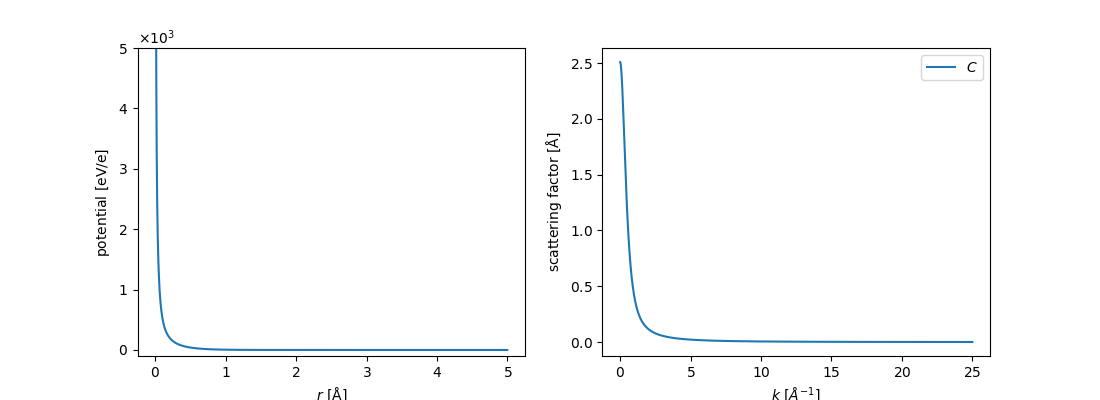

In [43]:
symbols = ["C"]

parametrization = LobatoParametrization()

potentials = parametrization.line_profiles(symbols, cutoff=5, name="potential")
scattering_factor = parametrization.line_profiles(
    symbols, cutoff=25, name="scattering_factor"
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
visualization = potentials.show(ax=ax1, legend=False)
visualization.set_ylim([-1e2, 5e3])

scattering_factor.show(legend=True, ax=ax2);

In cases when: 

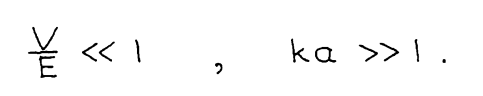

where $k$ is the wave number ($\frac{2 \pi}{\lambda}$), $a$ is the range over the potential varies, $V$ is the potential of the atom, and $E$ is the energy of the incoming electron, 
This criteria should be satisfied t least when the electron is scattering off a low atomic number atom, nd thus one can use the "Eikonal method" (a method which approximates the wave equation and enables electrons paths to be determined as straight lines perpendicular to a smooth wavefront) to determine the scattered diffraction pattern from an atom. This method will only enable the calculation of Fraunhofer diffraction, but this may still be enough to view diffraction peaks.

Another such derivation [here](https://link.springer.com/content/pdf/10.1007/978-1-4613-4112-3_10.pdf?pdf=inline%20link) notes:

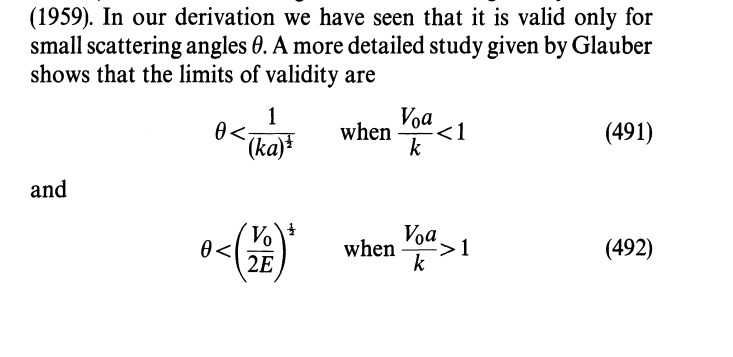

Interestingly, it is mentioned [here](https://link.springer.com/content/pdf/10.1007/978-1-4613-4112-3_10.pdf?pdf=inline%20link) that the first scattering factor calculated by the born series approximation should be equivalent to the scattering factor calculated by the eikonal series approximation. This is something we can test easily. 

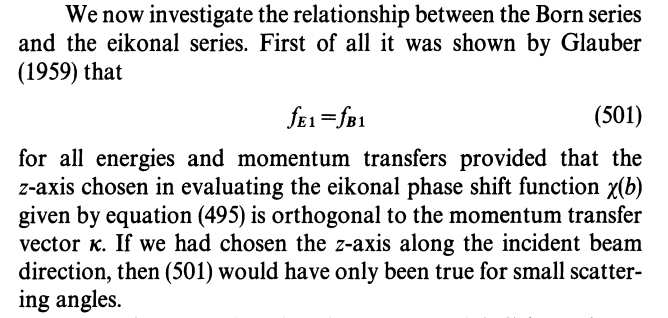

which is useful to know. I also understand what they mean by evaluating along the momemtum transfer vector $\kappa$ and will explain later. I am still unsure how much scattering calculated with the eikonal method will represent scattering with the born series approximation, as the born series makes the calculation that a spherical wave leaves the atom, while in the eikonal method there is simply a plane wave still. 


Anyway, Let's do a quick sanity check that the above criteria are met.

In [44]:
k = (2 * np.pi) / 1e-12
a = 5e-10
V = 1000
E = 200000

print('ka = ', k * a)
print("V / E = ", V / E)
print("Va / k = ", (V * a) / k)
print("Validity of Angular Range < 1 / (ka) ^ (1 / 2) = ", 1 / (k * a) ** (1 / 2), 'rads')

print('R << k * a ** 2', k * a ** 2)

ka =  3141.5926535897934
V / E =  0.005
Va / k =  7.957747154594769e-20
Validity of Angular Range < 1 / (ka) ^ (1 / 2) =  0.017841241161527712 rads
R << k * a ** 2 1.5707963267948967e-06


This rough calculation seems to suggest that for electron atom scattering at typical TEM energies, we can use the eikonal approximation to determine the path, amplitude and phase of the scattered electron. The angular range of validity is indeed small, however [Glauber](https://archive.org/details/in.ernet.dli.2015.177153) explains on page 344-346 how a small change to where we integrate along the ray path in the potential could increase the angular range of validity. 


References for the next part:

[EIKONAL THEORY OF ELECTRON- AND POSITRON-ATOM COLLISIONS - PHYSICS REPORTS Section C of Physics Letters 34, No. 4(1977) 233-324 ](https://www.sciencedirect.com/science/article/pii/037015737790014X)

[Lectures in theoretical physics. Volume 1-Interscience - High Energy Collision Theory, R.J Glauber (1959) Brittin W.E., Dunham L.G. (eds.)](https://archive.org/details/in.ernet.dli.2015.177153)

To perform the eikonal method there are a couple of equations that need to be solved. Firstly the setup of the model is this:

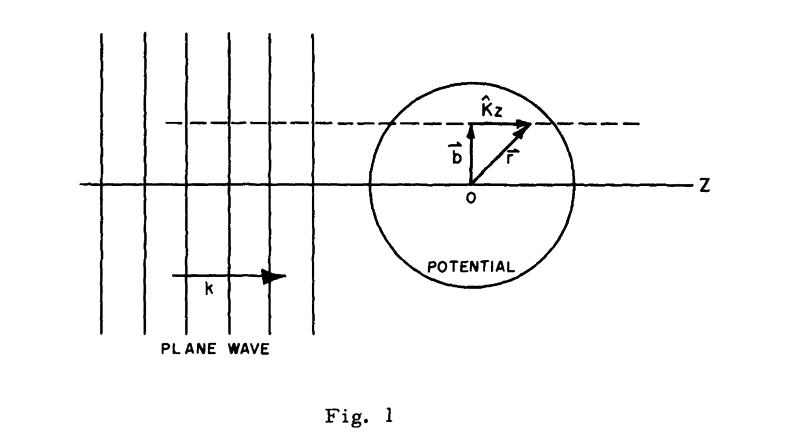

The impact parameter $b$ determines the incident location on the atom, and any integration over the potential to determine the outgoing phase of the plane wave is taken along the straight line path of the electron through the atom. At high energies, this approximation seems adequate at first, but a correction is described later. 

The first and most important equation is the eikonal "phase shift" that the electron sees when moving through the potential.  

$$
\chi(\vec{b})=-\frac{1}{\hbar v} \int_{-\infty}^{\infty} V\left(\vec{b}+\hat{k}z\right) d z .
$$


It is a function that depends on the chosen potential, and an impact parameter value $b$, which represents how close the electron is when it scatters off of the atom. Notice that the term $\vec{b}+\hat{k}z$ describes the path of the electron through the atom (see image above). Glauber mentions that originally, one can assume the path the electron takes through the atom is the same as the incident direction, and then when it leaves it has a new angle which we need to determine. However, he mentions a correction, which is that we can say the path the electron takes through the atom is not given by the incident direction, but by a path that joins the incident location and the exit location based on the scattered angle:

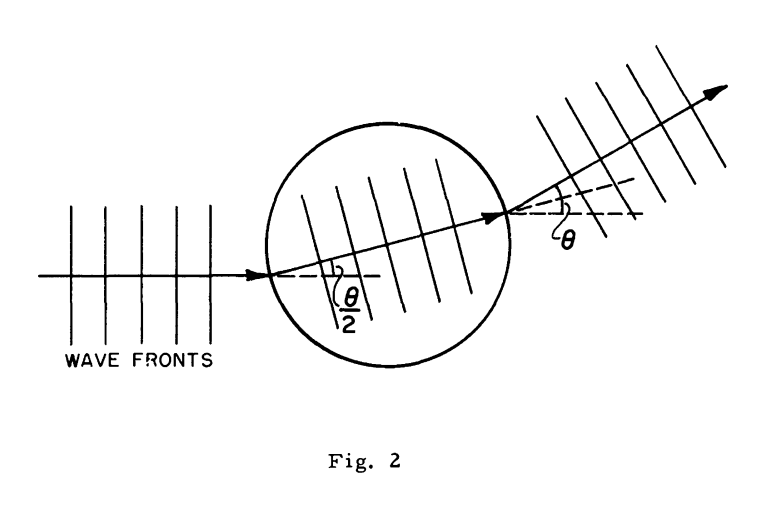

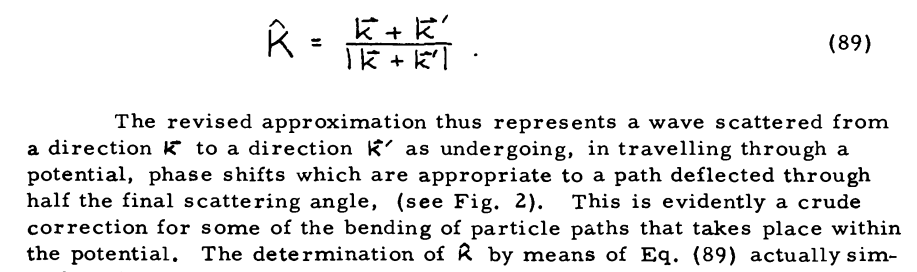

It is important to note that 

$q = (\vec{k}-\vec{k'})$

and 

$\left(\vec{k}-\vec{k}^{\prime}\right) \cdot \vec{b}=k b \theta \cos \phi$ (Note the small angle approximation is applied here $sin(\theta) = \theta$)

which relates the parameters $q$, $(\vec{k}-\vec{k'})$ and $\theta$ 

The next most imporant function then is the eikonal scattering amplitide:

$$
f\left(\vec{k}^{\prime}, \vec{k}\right)=\frac{k}{2 \pi i} \int e^{i\left(k-k^{\prime}\right) \cdot \vec{b}}\left\{e^{\chi(\vec{b})}-1\right\} d^{(2)} b .
$$

Notice how it is a function of the impact parameter $b$, the incoming angle $\vec{k}$, and the outgoing angle $\vec{k'}$. 

The question arises how do we calculate the outgoing angle, $\vec{k'}$?

My only suggestion is that we don't calculate it analytically, but draw it from the probability distribution we obtain by solving: 

- I think this suggestion is wrong, with the eikonal method, the rays should follow classical paths, so we can't draw from a distribution. The classical path must come from solving how the electron interacts with the potential. I think this is the only way. 

$f\left(\vec{k}^{\prime}, \vec{k}\right)=\frac{k}{2 \pi i} \int e^{i\left(k-k^{\prime}\right) \cdot \vec{b}}\left\{e^{\chi(\vec{b})}-1\right\} d^{(2)} b$


For an impact parameter $b$ and incoming direction $\vec{k}^{\prime}$, we can generate $f\left(\vec{k}^{\prime}, \vec{k}\right)$ for a range of outgoing
$\vec{k}^{\prime}$ s. 


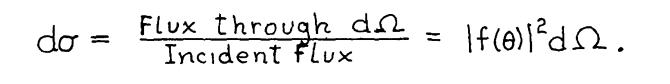

and thus $\frac{d\sigma}{d\Omega} = |f(\theta)|^2$

It's important to note that if we have a simplified case where the potential is a round potential, which is the case for a single atom, 

then a simplified scattering amplitude integral can be derived:

$$
f(\theta)=\frac{k}{i} \int_0^{\infty} J_0(2 k b \sin \theta)\left\{e^{i \chi(b)}-1\right\} b d b,
$$

For the first test, I think I will use this version as it simplifies the calculations a little I think. 

To summarise some of the main terms:

#### Scattering Amplitude
The scattering amplitude $f(\theta)$ is a complex function that describes the amplitude of the scattered wave as a function of the scattering angle $\theta$.

#### Differential Cross Section
The differential cross section $\frac{d\sigma}{d\Omega}$ is directly related to the scattering intensity and is defined as:
$\frac{d\sigma}{d\Omega} = |f(\theta)|^2$

This represents the probability per unit solid angle that a particle is scattered into a specific direction $\theta$.

#### Probability Density Function
The differential cross section $\frac{d\sigma}{d\Omega}$ can be normalized to form a probability density function $P(\theta)$ over the solid angle:
$P(\theta) = \frac{1}{\sigma_{\text{total}}} \frac{d\sigma}{d\Omega}$
where $\sigma_{\text{total}}$ is the total cross section, which is the integral of the differential cross section over all solid angles:
$\sigma_{\text{total}} = \int_{\text{all space}} \frac{d\sigma}{d\Omega} d\Omega$

### Drawing Scattered Angles from the Probability Distribution

Once the differential cross section is normalized to form a probability density function, it can be used to sample scattered angles. The process involves:

1. **Calculate the differential cross section**: Compute $\frac{d\sigma}{d\Omega}$ using the scattering amplitude $f(\theta)$.
2. **Normalize to get the probability density**: Normalize the differential cross section to obtain $P(\theta)$.
3. **Sample from the distribution**: Use statistical sampling techniques to draw angles $\theta$ based on the probability density function $P(\theta)$.

Note that if we have an arbitray potential, we need to draw samples from $\theta$ and the azimuthal angle $\phi$, but for now we will leave it. 


And now finally we can describe the process of how to use the eikonal approximation and the potential as given by Abtem to determine the scattered wave:



<br><br><br>



### Steps to use eikonal approximation to model atomic scattering

1. **Determine Potential Slice**: Use Abtem to get a slice of the atomic potential over a thickness in z. For now we will use a single atom. Alternatively, I might have to get the parametrisations from the paper, and calculate the potential on the fly based on the parametrisations presented in the paper, and the path the electron takes...

2. **Calculate Scattering Amplitude**: For an initial impact parameter $b$ and then a range of angles, we need to determine $f(\theta)$. This is achieved by solving this integral:

$$
f(\theta)=\frac{k}{i} \int_0^{\infty} J_0(2 k b \sin \theta)\left\{e^{i \chi(b)}-1\right\} b d b,
$$

where $b$ I believe is the initial impact parameter that is just the perpendicular distance between the atom and incident electron position. 

<details>

<summary>Correction to all angles</summary>

I have just learned from reading [Theory of Electron—Atom Collisions](https://books.google.fr/books/about/Theory_of_Electron_Atom_Collisions_Part.html?id=6gh0jGWeU78C&redir_esc=y), that there doesn't have to an an angular cutoff on the accuracy, and if we instead use this version of the equation:

$$
f^E = \frac{k}{i} \int_0^\infty J_0(\Delta b) \left\{ \exp[i\chi(k, b)] - 1 \right\} b \, db
$$

where 

$
\nabla = k_i - k_f
$

as in this diagram:

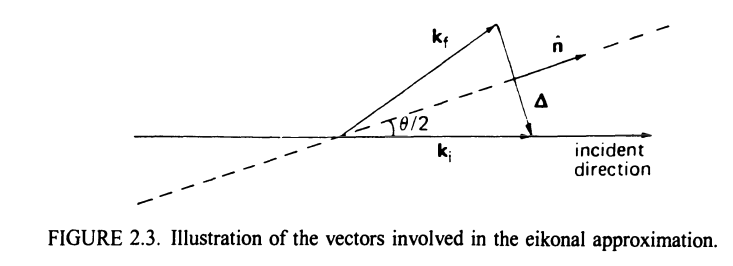

then result is apparently accurate for large angles. However, the impact parameter $b$ in this equation is perpendicular to $\hat{n}$ and this melts my brain when I think about what that means for the integral of $f^E$. I guess it means that one must choose a scattering angle, and then that defines the impact parameter $b$, but for each new angle, there is now a new impact parameter $b$ and direction to integrate over!. For now let's leave this computation behind. 


</details>



3. **Sample an Angle From the Scattering Amplitude**: Select an angle from $f(\theta)$ and determine the path the electron takes through that slice of potential.

4. **Determine the Phase Shift**: Once the path is determined, find the phase shift of the electron through the atom, and continue it on it's path at the new exit angle. 

We will start by making the potential for a single atom over a number of slices. 

In [45]:
import ase
import abtem
from abtem.core.energy import energy2wavelength
from ase import Atoms

# Define the number of slices and slice thickness

slice_thickness = 0.20  # in Angstroms

# Calculate the total thickness of the cell
total_thickness = 1.0

num_slices = total_thickness / slice_thickness

cell_x = 10.0
cell_y = 10.0
cell_z = total_thickness

# Create a cell with a large z-dimension
cell = [cell_x, cell_y, cell_z]  # 10x10 Angstroms in x and y, total_thickness in z

# Place a single gold atom at the center of the cell
position = [cell_x / 2, cell_y / 2, total_thickness / 2]
atoms = Atoms('Au', positions=[position], cell=cell, pbc=[False, False, False])

# Create the potential
potential = abtem.Potential(
    atoms,
    slice_thickness=slice_thickness,
    sampling=0.05,
    projection = 'finite'
)

# Define energy and calculate wavelength
energy_ev = 100e3
wavelength = energy2wavelength(energy_ev)  # m
print(wavelength)

# Compute the potential
V = potential.build().compute().array
print(V.shape)

0.037014365951263735
(5, 200, 200)


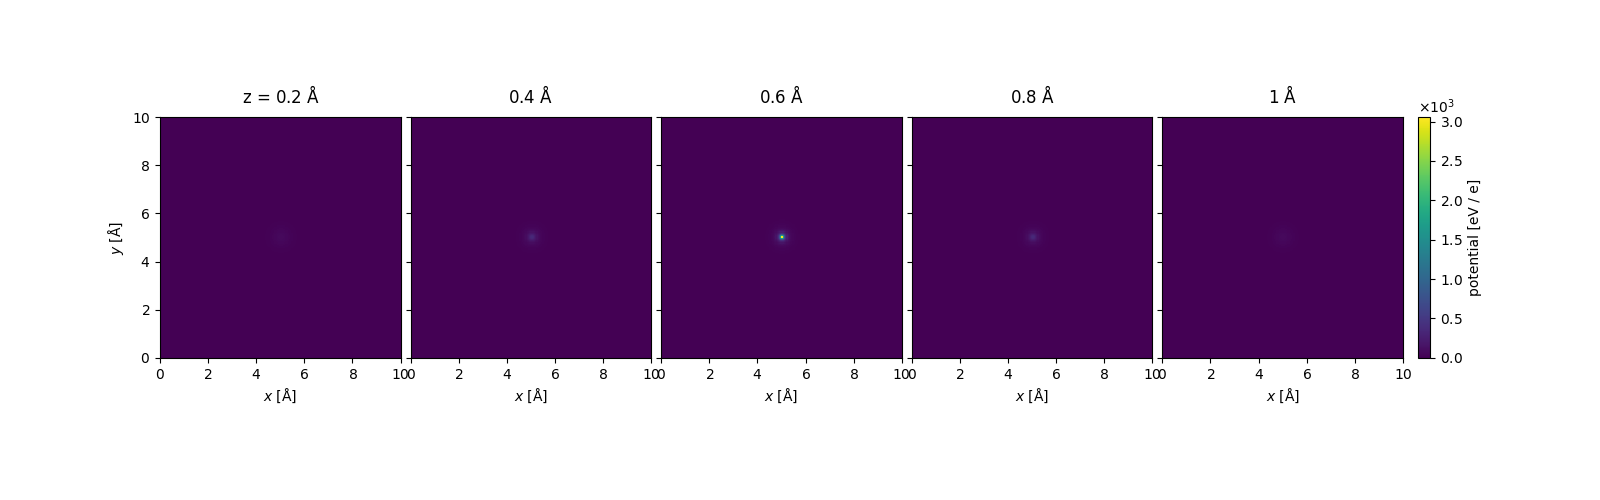

In [46]:
visualization = potential.build().show(
    project=False,
    explode=True,
    figsize=(16, 5),
    common_color_scale=True,
    cbar=True,
)

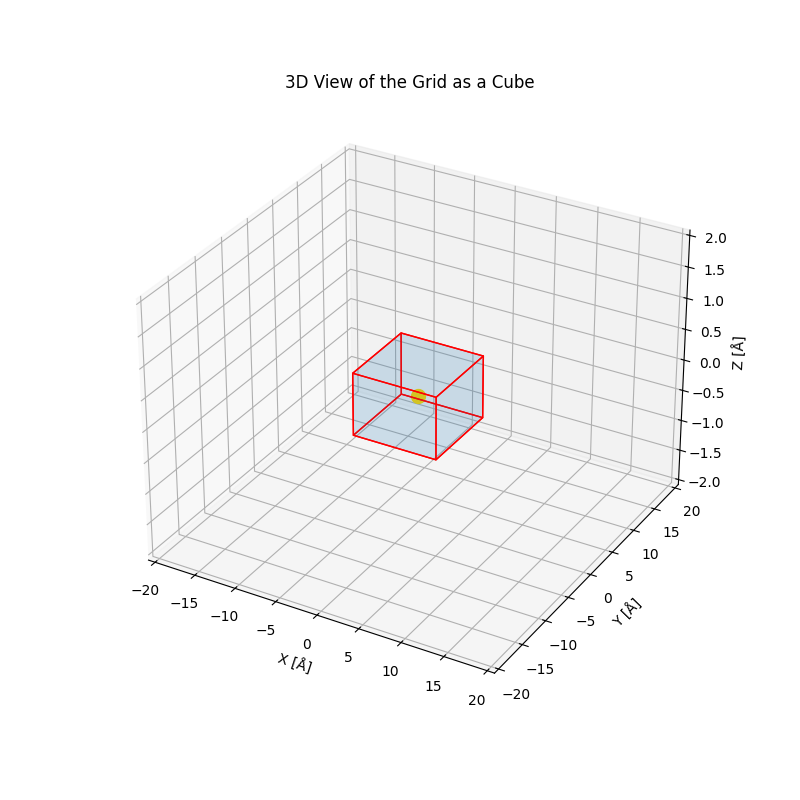

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_cube(cell, offset, scale=1):
    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define the vertices of the cube with the offset
    half_x = cell[0] / 2
    half_y = cell[1] / 2
    half_z = cell[2] / 2
    r = [[-half_x + offset[0], -half_y + offset[1], -half_z + offset[2]], 
         [half_x + offset[0], -half_y + offset[1], -half_z + offset[2]], 
         [half_x + offset[0], half_y + offset[1], -half_z + offset[2]], 
         [-half_x + offset[0], half_y + offset[1], -half_z + offset[2]], 
         [-half_x + offset[0], -half_y + offset[1], half_z + offset[2]], 
         [half_x + offset[0], -half_y + offset[1], half_z + offset[2]], 
         [half_x + offset[0], half_y + offset[1], half_z + offset[2]], 
         [-half_x + offset[0], half_y + offset[1], half_z + offset[2]]]
    
    # Define the 12 lines that make up the cube
    edges = [[r[j] for j in [0, 1, 2, 3, 0]],
             [r[j] for j in [4, 5, 6, 7, 4]],
             [r[j] for j in [0, 1, 5, 4, 0]],
             [r[j] for j in [2, 3, 7, 6, 2]],
             [r[j] for j in [1, 2, 6, 5, 1]],
             [r[j] for j in [4, 7, 3, 0, 4]]]
    
    # Create a Poly3DCollection object
    faces = Poly3DCollection(edges, linewidths=1, edgecolors='r', alpha=0.1)
    
    # Add the faces to the plot
    ax.add_collection3d(faces)
    
    # Scatter plot for the single gold atom
    ax.scatter(offset[0], offset[1], offset[2], color='gold', s=100)
    
    # Set the limits with scaling
    ax.set_xlim([offset[0] - half_x * scale, offset[0] + half_x * scale])
    ax.set_ylim([offset[1] - half_y * scale, offset[1] + half_y * scale])
    ax.set_zlim([offset[2] - half_z * scale, offset[2] + half_z * scale])
    
    # Set labels
    ax.set_xlabel('X [Å]')
    ax.set_ylabel('Y [Å]')
    ax.set_zlabel('Z [Å]')
    ax.set_title('3D View of the Grid as a Cube')
    
    plt.show()

# Define the offset (atom position)
offset = [0, 0, 0]  # Place the atom at the origin

half_x = cell[0] / 2
half_y = cell[1] / 2
half_z = cell[2] / 2

# Plot the cube with the offset and scale
plot_cube(cell, offset, scale=4)  # Adjust the scale as needed


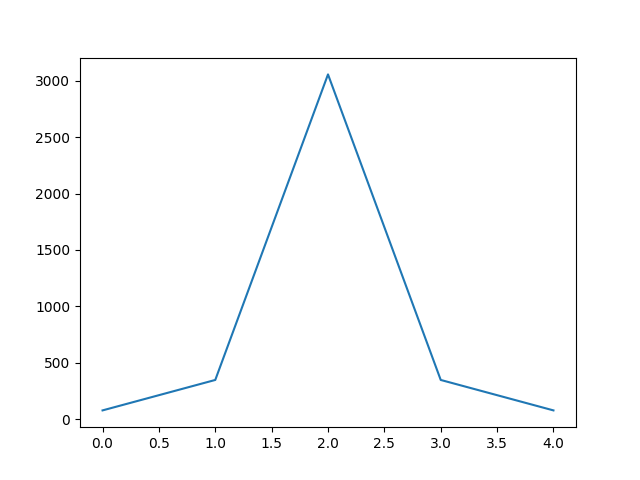

In [48]:
# parametrization = LobatoParametrization()
# from abtem.parametrizations.functions import lobato
# pot = parametrization.potential('N')
# dpot = parametrization.potential_derivative('N')
# F = -dpot
# x = np.linspace(-2, 2, 10)

plt.figure()
plt.plot(V[:, 100, 100])

[ 2.   0.  -0.5] [2.  0.  0.5] 1.0


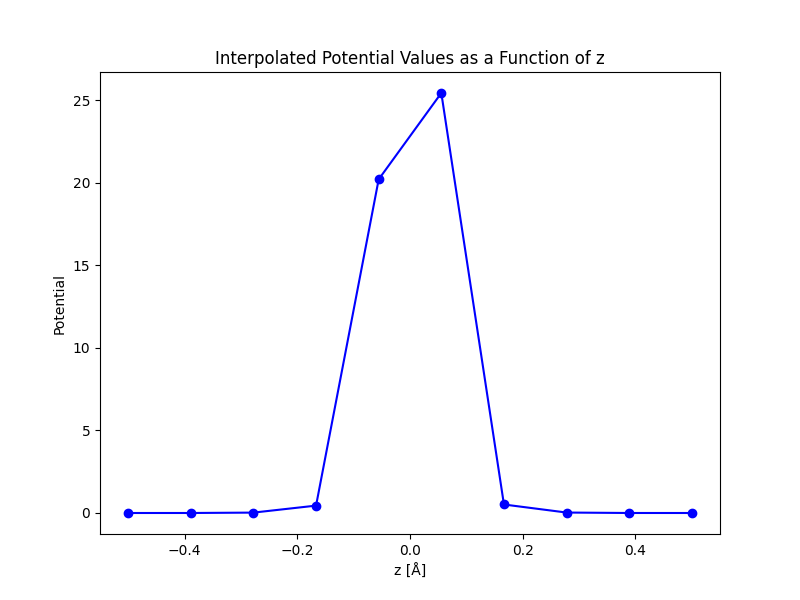

In [49]:
from abtem.core.energy import energy2sigma, energy2wavelength
from scipy.interpolate import RegularGridInterpolator

k_i = np.array([0.0, 0.0, 1.0])
k_hat = k_i
z_pot = total_thickness
h_bar = 1.0

PHI_0 = 100e3
wavelength = energy2wavelength(PHI_0)

k = 2 * np.pi / wavelength

# Define the original grid
nx, ny, nz = V.shape
x = np.linspace(-half_x, half_x, nx)  # x coordinates
y = np.linspace(-half_y, half_y, ny)  # y coordinates
z = np.linspace(-half_z, half_z, nz)  # z coordinates

# Create the interpolator
V_interp = RegularGridInterpolator((x, y, z), V)

b_mag = 2

b = np.array([b_mag , 0.0, -half_z])
r_i = np.array([b_mag, 0.0, -half_z])
r_o = b + k_hat * z_pot

print(r_i, r_o, z_pot)

interpolated_points = np.linspace(r_i, r_o, 10)

# Get the potential values at the interpolated points
V_values = V_interp(interpolated_points)

# Extract the z-coordinates of the interpolated points
z_values = interpolated_points[:, 2]

# Plot the potential values as a function of z
plt.figure(figsize=(8, 6))
plt.plot(z_values, V_values, marker='o', linestyle='-', color='b')
plt.xlabel('z [Å]')
plt.ylabel('Potential')
plt.title('Interpolated Potential Values as a Function of z')
plt.show()

/home/landers/miniconda3/envs/WPM/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


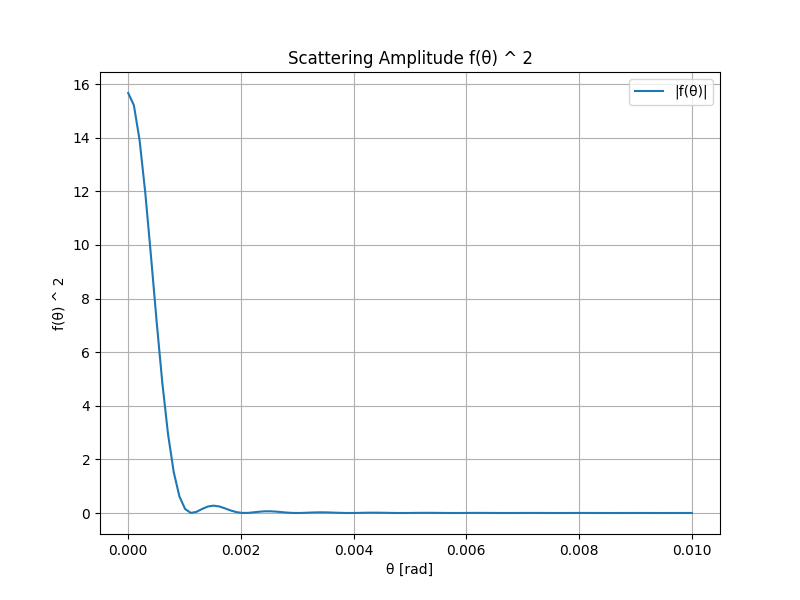

In [50]:
from scipy.integrate import quad
from scipy.special import j0

chi_b = -np.trapz(V_values, z_values) / (k)
theta_values = np.linspace(0, 0.01, 100)  # Range of theta


# Define the integrand function
def integrand(b, theta):
    return j0(2 * k * b * np.sin(theta)) * (np.exp(1j * chi_b) - 1) * b

# Calculate f(theta) for each theta
f_theta = np.zeros_like(theta_values, dtype=np.complex128)

for i, theta in enumerate(theta_values):
    result, _ = quad(integrand, 0, 10, args=(theta))  # Adjust the integration range as needed
    f_theta[i] = k / 1j * result

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(theta_values, np.abs(f_theta) ** 2 , label='|f(θ)|')
plt.xlabel('θ [rad]')
plt.ylabel('f(θ) ^ 2')
plt.title('Scattering Amplitude f(θ) ^ 2')
plt.legend()
plt.grid(True)
plt.show()

0.004923106358606972
Integral of P(θ, φ) over all solid angles: 1.0000000000000002


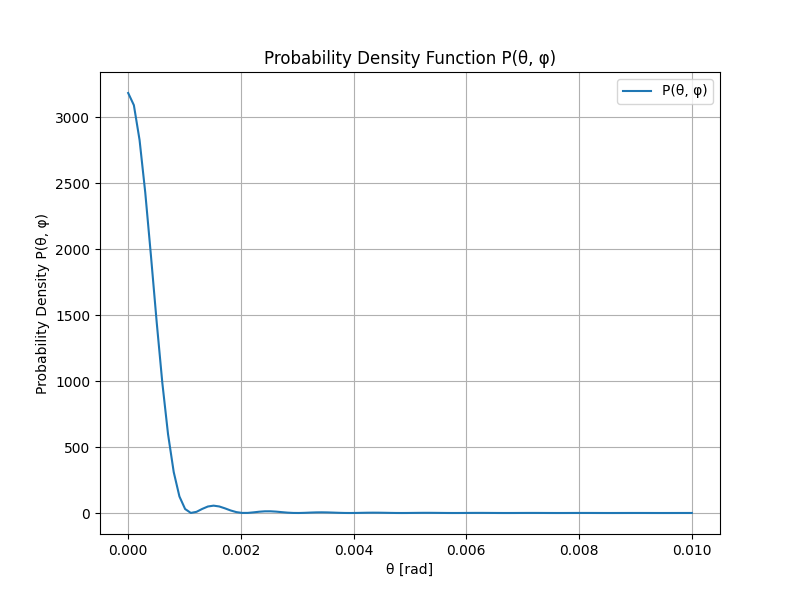

In [51]:
# Differential cross section
d_sigma_d_Omega = np.abs(f_theta)**2

# Total cross section
sigma_total, _ = quad(lambda theta: 2 * np.pi * np.abs(f_theta[int((theta / np.pi) * len(theta_values))])**2 * np.sin(theta), 0, 0.01)

print(sigma_total)

# Probability density function
P_theta_phi = d_sigma_d_Omega / sigma_total

P_integral, _ = quad(lambda theta: 2 * np.pi * P_theta_phi[int((theta / np.pi) * len(theta_values))] * np.sin(theta), 0, 0.01)

print(f"Integral of P(θ, φ) over all solid angles: {P_integral}")

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(theta_values, P_theta_phi, label='P(θ, φ)')
plt.xlabel('θ [rad]')
plt.ylabel('Probability Density P(θ, φ)')
plt.title('Probability Density Function P(θ, φ)')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import numpy as np
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d

# Compute the CDF
cdf_theta = cumtrapz(P_theta_phi, theta_values, initial=0)
cdf_theta /= cdf_theta[-1]  # Normalize to ensure it goes from 0 to 1

print(cdf_theta)

# Interpolate the inverse CDF
inverse_cdf_theta = interp1d(cdf_theta, theta_values, kind='linear')

# Number of samples you want to generate
num_samples = 10

# Generate random samples uniformly distributed between 0 and 1
uniform_samples = np.random.uniform(0, 1, num_samples)

# Transform the uniform samples into samples that follow the PDF
theta_samples = inverse_cdf_theta(uniform_samples)

print(theta_samples)

[0.         0.1991328  0.38695051 0.55374137 0.69268245 0.80056534
 0.87785052 0.92809102 0.95689954 0.97071671 0.97565324 0.97662813
 0.97692695 0.97818923 0.98073335 0.98406522 0.98740432 0.99009331
 0.99181868 0.99263888 0.99287067 0.9929134  0.99308835 0.99354599
 0.99425731 0.9950727  0.99581173 0.99634377 0.99663171 0.99672987
 0.99674632 0.99679101 0.99693266 0.9971796  0.99748799 0.99778931
 0.99802321 0.99816154 0.99821548 0.99822539 0.99824029 0.99829661
 0.9984052  0.99855065 0.99870151 0.99882581 0.99890472 0.99893897
 0.99894631 0.99895209 0.99897782 0.99903262 0.99911091 0.9991965
 0.99927077 0.99932086 0.99934467 0.99935066 0.99935321 0.99936599
 0.99939618 0.99944213 0.99949491 0.99954293 0.99957712 0.99959471
 0.99959982 0.99960115 0.99960783 0.99962548 0.99965412 0.99968864
 0.99972147 0.99974605 0.99975961 0.9997641  0.99976497 0.99976856
 0.9997793  0.99979794 0.99982152 0.99984492 0.99986327 0.99987406
 0.99987807 0.99987879 0.99988075 0.99988747 0.99989999 0.99991

/tmp/ipykernel_1078153/1884585580.py:6: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf_theta = cumtrapz(P_theta_phi, theta_values, initial=0)
